# Dataset 1 - Clasificación: Regresión Logística

###Implementación de Regresion Logistica al dataset "CS:GO Round Winner Classification" que contiene un conjunto de datos de rondas del JUEGO COUNTER STRIKE de aproximadamente 700 demostraciones de torneos de alto nivel en 2019 y 2020. El número total de ejemplos m es igual a 122410. El número total de Características X es de 96 y una Etiqueta para predecir el ganador de la ronda de juego: CT o T (Clasificación binaria).
###Preprocesamiento del dataset con Pandas

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. Librerías

In [36]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

#Libreria pandas y scikitlearn para el preprocesamiento de datasets
import pandas as pd
import sklearn as skl

#2. Contenido del dataset
En primer lugar, el contenido del dataset se carga en "dataframe", el cual Panda utilizará como unidad de información.\
Luego se muestra y describe con un resumen el contenido del dataframe.\
El dataset contiene un total de 122410 rondas de juego con los que se puede predecir el un ganador de la ronda (CT ó T) analizando varias características de las rondas de juego. Los datos contienen 96 características y la etiqueta 'y' contiene dos Clases (CT, T).

In [37]:
dataframe = pd.read_csv('/content/drive/MyDrive/SIS 420/PrimerParcial1/csgo_round_snapshots.csv')
print(dataframe)
print(dataframe.describe())

        time_left  ct_score  t_score       map  bomb_planted  ct_health  \
0          175.00       0.0      0.0  de_dust2         False      500.0   
1          156.03       0.0      0.0  de_dust2         False      500.0   
2           96.03       0.0      0.0  de_dust2         False      391.0   
3           76.03       0.0      0.0  de_dust2         False      391.0   
4          174.97       1.0      0.0  de_dust2         False      500.0   
...           ...       ...      ...       ...           ...        ...   
122405      15.41      11.0     14.0  de_train          True      200.0   
122406     174.93      11.0     15.0  de_train         False      500.0   
122407     114.93      11.0     15.0  de_train         False      500.0   
122408      94.93      11.0     15.0  de_train         False      500.0   
122409      74.93      11.0     15.0  de_train         False      375.0   

        t_health  ct_armor  t_armor  ct_money  ...  t_grenade_flashbang  \
0          500.0       0

#3.Preprocesamiento del dataset

###3.1. Preprocesamiento del dataset: Separar atributos(X) de la etiqueta (y) que se va a usar para el entrenamiento
Los atributos(X) se van a cargar en la variable "dataset" y la etiqueta "y" en la variable "label".

In [38]:
dataset = dataframe.drop("round_winner", axis=1)
label = dataframe["round_winner"].copy()

###3.2. Preprocesamiento del dataset: Atributos con texto
En nuestro dataset tenemos 2 atributos NO NUMÉRICO que son "map" y "bomb_planted".

###3.2.1 CARACTERÍSTICA "map"

###Manejo de los datos Not a Number
Para asegurar que no haya valores faltantes o indefinidos en los datos, o que estén vacíos se va a hacer una limpieza de datos\
Limpieza por Imputación: Los valores faltantes se van a reemplazar con un valor sustituto. Para datos categóricos, una estrategia común es reemplazar los nan por la moda (el valor más frecuente) de la columna.\
Ésta imputación lo realizamos con herramientas de Pandas y scikit-learn:

In [39]:
# Tenemos el dataFrame y 'key' es la columna con valores NaN
mode_value = dataframe['map'].mode()[0]  # Encuentra la moda de la columna
dataframe['map'].fillna(mode_value, inplace=True)  # Reemplaza NaN con la moda

###Ahora, los atributos de texto de la característica "map" lo cargamos en la variable map_cat y lo mostramos.

In [40]:
map_cat = dataframe[['map']]
print(map_cat.head(12))

         map
0   de_dust2
1   de_dust2
2   de_dust2
3   de_dust2
4   de_dust2
5   de_dust2
6   de_dust2
7   de_dust2
8   de_dust2
9   de_dust2
10  de_dust2
11  de_dust2


##Preprocesamiento con OneHotEncoder de sklearn
Ésto devuelve una codificación donde se indica el número de instancia dentro del dataset, número de atributo binario y el valor.
Con el método toarray() convertimos a una matriz y mostramos sus valores y tamaño (shape).

In [41]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
map_cat_one_hot = one_hot_encoder.fit_transform(map_cat)
print(map_cat_one_hot.toarray().shape)
print(map_cat_one_hot.toarray())

(122410, 8)
[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


##Visualización de los nombres de todas las categorías de "map"

In [42]:
# Visualizar los nombres de las categorías
categories = one_hot_encoder.categories_

# Dado que map_cat es una sola columna, categories_ será una lista de un solo elemento.
# Accedemos a este primer elemento para obtener las categorías
print(categories[0])

['de_cache' 'de_dust2' 'de_inferno' 'de_mirage' 'de_nuke' 'de_overpass'
 'de_train' 'de_vertigo']


###Crear un DataFrame para las características codificadas, concatenar con las características originales y mostrar

In [43]:
# Crear un DataFrame para las características codificadas
encoded_df = pd.DataFrame(map_cat_one_hot.toarray(), columns=['de_cache', 'de_dust2', 'de_inferno', 'de_mirage', 'de_nuke', 'de_overpass',
 'de_train', 'de_vertigo'])

# Concatenar las características originales con las características codificadas
df_nuevo = pd.concat([dataset, encoded_df], axis=1)

# Visualizar el nuevo DataFrame
print(df_nuevo.head())

   time_left  ct_score  t_score       map  bomb_planted  ct_health  t_health  \
0     175.00       0.0      0.0  de_dust2         False      500.0     500.0   
1     156.03       0.0      0.0  de_dust2         False      500.0     500.0   
2      96.03       0.0      0.0  de_dust2         False      391.0     400.0   
3      76.03       0.0      0.0  de_dust2         False      391.0     400.0   
4     174.97       1.0      0.0  de_dust2         False      500.0     500.0   

   ct_armor  t_armor  ct_money  ...  ct_grenade_decoygrenade  \
0       0.0      0.0    4000.0  ...                      0.0   
1     400.0    300.0     600.0  ...                      0.0   
2     294.0    200.0     750.0  ...                      0.0   
3     294.0    200.0     750.0  ...                      0.0   
4     192.0      0.0   18350.0  ...                      0.0   

   t_grenade_decoygrenade  de_cache  de_dust2  de_inferno  de_mirage  de_nuke  \
0                     0.0       0.0       1.0        

###3.2.2 CARACTERÍSTICA "bomb_planted"

###Manejo de los datos Not a Number por imputación

In [44]:
# Tenemos el dataFrame y 'mode' es la columna con valores NaN
mode_value = dataframe['bomb_planted'].mode()[0]  # Encuentra la moda de la columna
dataframe['bomb_planted'].fillna(mode_value, inplace=True)  # Reemplaza NaN con la moda

###Los atributos de texto de la característica "bomb_planted" lo cargamos en la variable bomb_planted_cat y lo mostramos.

In [45]:
bomb_planted_cat = dataframe[['bomb_planted']]
print(bomb_planted_cat.head(12))

    bomb_planted
0          False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
8          False
9          False
10         False
11         False


##Preprocesamiento con OneHotEncoder de sklearn

In [46]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
bomb_planted_cat_one_hot = one_hot_encoder.fit_transform(bomb_planted_cat)
print(bomb_planted_cat_one_hot.toarray().shape)
print(bomb_planted_cat_one_hot.toarray())

(122410, 2)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


##Visualización de los nombres de todas las categorías de "bomb_planted"

In [47]:
# Visualizar los nombres de las categorías
categories = one_hot_encoder.categories_

# Dado que key_cat es una sola columna, categories_ será una lista de un solo elemento.
# Accedemos a este primer elemento para obtener las categorías
print(categories[0])

[False  True]


###Crear un DataFrame para las características codificadas, concatenar con las características originales y mostrar

In [48]:
# Crear un DataFrame para las características codificadas
encoded_df = pd.DataFrame(bomb_planted_cat_one_hot.toarray(), columns=['False','True'])

# Concatenar las características originales con las características codificadas
df_new = pd.concat([df_nuevo, encoded_df], axis=1)

# Visualizar el nuevo DataFrame
print(df_new.head())

   time_left  ct_score  t_score       map  bomb_planted  ct_health  t_health  \
0     175.00       0.0      0.0  de_dust2         False      500.0     500.0   
1     156.03       0.0      0.0  de_dust2         False      500.0     500.0   
2      96.03       0.0      0.0  de_dust2         False      391.0     400.0   
3      76.03       0.0      0.0  de_dust2         False      391.0     400.0   
4     174.97       1.0      0.0  de_dust2         False      500.0     500.0   

   ct_armor  t_armor  ct_money  ...  de_cache  de_dust2  de_inferno  \
0       0.0      0.0    4000.0  ...       0.0       1.0         0.0   
1     400.0    300.0     600.0  ...       0.0       1.0         0.0   
2     294.0    200.0     750.0  ...       0.0       1.0         0.0   
3     294.0    200.0     750.0  ...       0.0       1.0         0.0   
4     192.0      0.0   18350.0  ...       0.0       1.0         0.0   

   de_mirage  de_nuke  de_overpass  de_train  de_vertigo  False  True  
0        0.0      0.

###Eliminar las características originales "map" y "bomb_planted" del df_new

In [49]:
# Eliminar la característica 'map' y 'bomb_planted' de df_new:
df_new_sin_map_sin_bomb_planted = df_new.drop(columns=['map', 'bomb_planted'])

# Visualizar el nuevo DataFrame sin las características 'map', 'bomb_planted'
print(df_new_sin_map_sin_bomb_planted.head())

   time_left  ct_score  t_score  ct_health  t_health  ct_armor  t_armor  \
0     175.00       0.0      0.0      500.0     500.0       0.0      0.0   
1     156.03       0.0      0.0      500.0     500.0     400.0    300.0   
2      96.03       0.0      0.0      391.0     400.0     294.0    200.0   
3      76.03       0.0      0.0      391.0     400.0     294.0    200.0   
4     174.97       1.0      0.0      500.0     500.0     192.0      0.0   

   ct_money  t_money  ct_helmets  ...  de_cache  de_dust2  de_inferno  \
0    4000.0   4000.0         0.0  ...       0.0       1.0         0.0   
1     600.0    650.0         0.0  ...       0.0       1.0         0.0   
2     750.0    500.0         0.0  ...       0.0       1.0         0.0   
3     750.0    500.0         0.0  ...       0.0       1.0         0.0   
4   18350.0  10750.0         0.0  ...       0.0       1.0         0.0   

   de_mirage  de_nuke  de_overpass  de_train  de_vertigo  False  True  
0        0.0      0.0          0.0    

### Visualizar el dataset df_new_sin_map_sin_bomb_planted

In [50]:
print(df_new_sin_map_sin_bomb_planted.head(10))

   time_left  ct_score  t_score  ct_health  t_health  ct_armor  t_armor  \
0     175.00       0.0      0.0      500.0     500.0       0.0      0.0   
1     156.03       0.0      0.0      500.0     500.0     400.0    300.0   
2      96.03       0.0      0.0      391.0     400.0     294.0    200.0   
3      76.03       0.0      0.0      391.0     400.0     294.0    200.0   
4     174.97       1.0      0.0      500.0     500.0     192.0      0.0   
5     114.97       1.0      0.0      500.0     500.0     500.0      0.0   
6      94.97       1.0      0.0      295.0     111.0     296.0      0.0   
7      74.97       1.0      0.0      295.0     111.0     296.0      0.0   
8      54.97       1.0      0.0      249.0      89.0     269.0      0.0   
9     174.97       2.0      0.0      500.0     500.0     196.0      0.0   

   ct_money  t_money  ct_helmets  ...  de_cache  de_dust2  de_inferno  \
0    4000.0   4000.0         0.0  ...       0.0       1.0         0.0   
1     600.0    650.0        

###3.3. ADECUAR LOS VALORES DE "round_winner"  ->  "y"
En la etiqueta "round_winner" tenemos 2 clases.\
Adecuamos a valores numéricos de esta forma:\
0 CT\
1 T


In [51]:
# Definir el mapeo de round_winner a números enteros.
round_winner_to_number = {
    'CT': 0,
    'T': 1
}

# Aplicar el mapeo a la serie 'label'.
label_mapped = label.map(round_winner_to_number)

# Verificar los cambios realizando una impresión de los primeros elementos.
print(label_mapped.head())

0    0
1    0
2    0
3    0
4    0
Name: round_winner, dtype: int64


###Concatenamos 'round_winner' a df_new_sin_map_sin_bomb_planted. El DataFrame final es: df_final

In [53]:
# Previamente ya definimos df_new_sin_map_sin_bumb_planted y label_mapped
# Concatenamos 'round_winner' a df_new_sin_map_sin_bumb_planted de la siguiente manera:
df_final = pd.concat([df_new_sin_map_sin_bomb_planted, label_mapped], axis=1)

# Visualizar el nuevo DataFrame final
print(df_final.head())

   time_left  ct_score  t_score  ct_health  t_health  ct_armor  t_armor  \
0     175.00       0.0      0.0      500.0     500.0       0.0      0.0   
1     156.03       0.0      0.0      500.0     500.0     400.0    300.0   
2      96.03       0.0      0.0      391.0     400.0     294.0    200.0   
3      76.03       0.0      0.0      391.0     400.0     294.0    200.0   
4     174.97       1.0      0.0      500.0     500.0     192.0      0.0   

   ct_money  t_money  ct_helmets  ...  de_dust2  de_inferno  de_mirage  \
0    4000.0   4000.0         0.0  ...       1.0         0.0        0.0   
1     600.0    650.0         0.0  ...       1.0         0.0        0.0   
2     750.0    500.0         0.0  ...       1.0         0.0        0.0   
3     750.0    500.0         0.0  ...       1.0         0.0        0.0   
4   18350.0  10750.0         0.0  ...       1.0         0.0        0.0   

   de_nuke  de_overpass  de_train  de_vertigo  False  True  round_winner  
0      0.0          0.0      

## 4. Aplicación de la Regresión Logística
Se crea un modelo de regresión logística para predecir quien es el ganador de la ronda de juego.

A continuación se cargará los datos y las etiquetas correspondientes.


###4.1. Los datos se dividen en dos partes: Entrenamiento (80% de los ejemplos) y Prueba (20% de los ejemplos)
En pandas, para seleccionar filas y columnas específicas, se utiliza los métodos iloc[] o loc[].\
El método iloc[] se utiliza para seleccionar datos mediante la posición de las filas y columnas en el DataFrame.

In [54]:
# Cargar datos
# Las columnas 1 a 104 contienen las características del juego y la columna 105
# contiene la etiqueta que indica quien es el ganador 0 ó 1.

# Definir X_train, y_train, X_test, y_test
X_train = df_final.iloc[1:97928, 0:104]
y_train = df_final.iloc[1:97928, 104]
X_test = df_final.iloc[97928:, 0:104]
y_test = df_final.iloc[97928:, 104]

# Visualizar X_train y y_train
print(X_train)
print(y_train)

       time_left  ct_score  t_score  ct_health  t_health  ct_armor  t_armor  \
1         156.03       0.0      0.0      500.0     500.0     400.0    300.0   
2          96.03       0.0      0.0      391.0     400.0     294.0    200.0   
3          76.03       0.0      0.0      391.0     400.0     294.0    200.0   
4         174.97       1.0      0.0      500.0     500.0     192.0      0.0   
5         114.97       1.0      0.0      500.0     500.0     500.0      0.0   
...          ...       ...      ...        ...       ...       ...      ...   
97923     103.50       0.0      0.0      500.0     480.0     400.0    388.0   
97924      83.50       0.0      0.0      188.0     349.0     193.0    271.0   
97925      30.13       0.0      0.0      100.0     349.0     100.0    271.0   
97926      10.13       0.0      0.0      100.0     238.0     100.0    169.0   
97927     174.93       0.0      1.0      500.0     500.0     100.0    169.0   

       ct_money  t_money  ct_helmets  ...  de_cache

<a id="section1"></a>
### 4.2 Implementacion


### Hipótesis para la regresión logística:

$$ h_\theta(x) = g(\theta^T x)$$

### Función Sigmoidea:

$$g(z) = \frac{1}{1+e^{-z}}$$.


###Definición de la función sigmoidea g:

In [55]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la entrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

###Cálculo del valor de la sigmoidea para z=0,  z=0.25,  z=0.5,  z=0.75  y  z=1

In [56]:
# Prueba la implementacion de la funcion sigmoidea
z = [0, 0.25, 0.5, 0.75,  1]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.25, 0.5, 0.75, 1] ) =  [0.5        0.5621765  0.62245933 0.6791787  0.73105858]


###4.3. Normalización de los valores de las características

In [57]:
import numpy as np

# Los datos preprocesados lo tenemos en el DataFrame llamado df_final. Vamos a normalizar las características (columnas 0 a 104)
X = df_final.iloc[:, 0:104]

# Las etiquetas están en la columna 104 del DataFrame df_final
y = df_final.iloc[:, 104]


def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    # Manejar el caso de desviación estándar igual a cero
    sigma[sigma == 0] = 1  # Si la desviación estándar es cero, establecerla a 1

    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [58]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

In [59]:
print(X_norm)

        time_left  ct_score   t_score  ct_health  t_health  ct_armor  \
0        1.415828 -1.400576 -1.405702   0.664386  0.695301 -1.836777   
1        1.067531 -1.400576 -1.405702   0.664386  0.695301  0.502008   
2       -0.034094 -1.400576 -1.405702  -0.159544 -0.019401 -0.117770   
3       -0.401302 -1.400576 -1.405702  -0.159544 -0.019401 -0.117770   
4        1.415277 -1.191823 -1.405702   0.664386  0.695301 -0.714160   
...           ...       ...       ...        ...       ...       ...   
122405  -1.514310  0.895711  1.496741  -1.603312 -1.148630 -0.696619   
122406   1.414542  0.895711  1.704058   0.664386  0.695301 -1.281315   
122407   0.312918  0.895711  1.704058   0.664386  0.695301  1.057469   
122408  -0.054290  0.895711  1.704058   0.664386  0.695301  1.057469   
122409  -0.421498  0.895711  1.704058  -0.280488  0.545214  0.472773   

         t_armor  ct_money   t_money  ct_helmets  ...  de_cache  de_dust2  \
0      -1.709542 -0.516186 -0.595345   -1.115364  ... -0.0

<a id="section2"></a>
###4.4. Agregar el término de intersección a X ->  X0 (bias)   con np.ones()

In [60]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
# X = np.concatenate([np.ones((m, 1)), X], axis=1)

<a id="section2"></a>
###4.5. Función de Costo y Gradiente para regresión logística

Función de costo:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

Gradiente del costo:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$
<a id="costFunction"></a>

###Definición de la función calcularCosto()

In [61]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

###Definición de la función descensoGradiente()

In [62]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

##Iteraciones:
###alpha = 0.010
###num_iters = 6000
###theta igual a un vector de ceros.

theta calculado por el descenso por el gradiente: [ 1.10771087e-01  5.68977943e-02 -2.18887691e-02  1.63854693e-02
 -3.81889407e-01  3.72037703e-01 -5.51024212e-01  5.23853864e-01
 -1.56916247e-01  1.28316902e-01 -6.37127657e-02  4.12914948e-01
 -3.05534368e-02 -3.88880788e-01  4.71939812e-01 -1.52391967e-01
  3.70094485e-01 -1.62168119e-01  2.69053973e-02 -2.58995059e-01
  1.65129285e-01  0.00000000e+00 -2.51980690e-04 -7.68000412e-02
  6.97772952e-02 -1.93118839e-02  2.05881293e-02 -1.17537724e-01
  3.94747398e-02  0.00000000e+00  1.21520984e-02 -5.05032612e-02
  7.10753693e-02  4.36173909e-03  1.82786144e-01  1.26152392e-02
  0.00000000e+00 -7.72024556e-02  4.33383828e-02 -3.82730711e-01
  6.25882952e-02 -4.71655182e-03  4.84364209e-02 -1.46255494e-02
  1.32868502e-02 -1.14894561e-02  3.49273928e-02  8.29816495e-03
 -1.45763550e-02 -9.83389976e-02  2.36993216e-02  0.00000000e+00
 -9.63108694e-03 -1.71889374e-02 -1.63644850e-02 -2.14117144e-02
  1.11741124e-02  0.00000000e+00 -1.7480

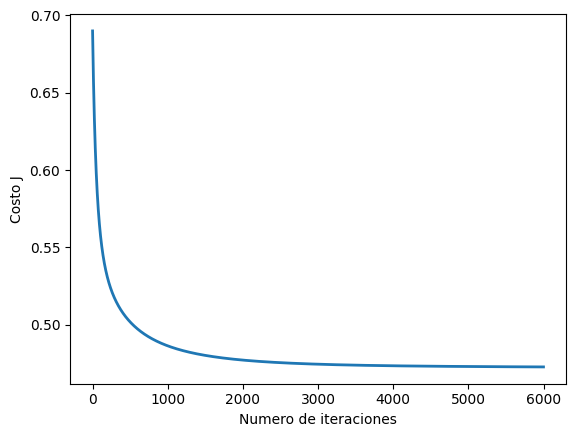

In [63]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.010                                                                   #Ensayos con alpha = 0.001, 0.003, 0.005, 0.008, 0.010
num_iters = 6000                                                                #Ensayos con num_iters = 40000, 10000, 8000, 6000, 5000, 4000, 1000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(105)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

#5. Procesamiento de los ejemplos de prueba (20% de los datos)

In [64]:
print(X_test)
print('Valores de theta:')
print(theta)

        time_left  ct_score  t_score  ct_health  t_health  ct_armor  t_armor  \
97928      114.93       0.0      1.0      500.0     500.0     300.0    500.0   
97929       94.93       0.0      1.0      500.0     478.0     400.0    498.0   
97930       32.66       0.0      1.0      100.0     438.0     100.0    492.0   
97931      174.91       0.0      2.0      500.0     500.0       0.0    491.0   
97932      114.91       0.0      2.0      500.0     500.0     400.0    491.0   
...           ...       ...      ...        ...       ...       ...      ...   
122405      15.41      11.0     14.0      200.0     242.0     195.0    359.0   
122406     174.93      11.0     15.0      500.0     500.0      95.0    175.0   
122407     114.93      11.0     15.0      500.0     500.0     495.0    475.0   
122408      94.93      11.0     15.0      500.0     500.0     495.0    475.0   
122409      74.93      11.0     15.0      375.0     479.0     395.0    466.0   

        ct_money  t_money  ct_helmets  

###Visualización de las características y etiqueta para los ejemplos de Prueba:

In [65]:
X_test, y_test = df_final.iloc[97928:, 0:104], df_final.iloc[97928:, 104]
print(X_test)
print(y_test)

        time_left  ct_score  t_score  ct_health  t_health  ct_armor  t_armor  \
97928      114.93       0.0      1.0      500.0     500.0     300.0    500.0   
97929       94.93       0.0      1.0      500.0     478.0     400.0    498.0   
97930       32.66       0.0      1.0      100.0     438.0     100.0    492.0   
97931      174.91       0.0      2.0      500.0     500.0       0.0    491.0   
97932      114.91       0.0      2.0      500.0     500.0     400.0    491.0   
...           ...       ...      ...        ...       ...       ...      ...   
122405      15.41      11.0     14.0      200.0     242.0     195.0    359.0   
122406     174.93      11.0     15.0      500.0     500.0      95.0    175.0   
122407     114.93      11.0     15.0      500.0     500.0     495.0    475.0   
122408      94.93      11.0     15.0      500.0     500.0     495.0    475.0   
122409      74.93      11.0     15.0      375.0     479.0     395.0    466.0   

        ct_money  t_money  ct_helmets  

###Predicción del ganador de la ronda de juego utilizando la regresión logística (Primer ejemplo del conjunto de prueba)
X_test_norm, mu, sigma = featureNormalize(X_test): Normaliza las características de prueba X_test utilizando la función featureNormalize.\
X_test_norm = np.concatenate([np.ones((m, 1)), X_test_norm], axis=1): Agrega una columna de unos (sesgo) al inicio de la matriz de características normalizadas.

In [66]:
# verificar si una ronda de juego gana CT(0) o T(1)
# X_array = [1, 114.93, 0, 1,500,500,300,500,5500,800,3,5,0,5,5,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,1,3,1,0,0,0,0,0,0,0,0,5,0,4,0,0,0,3,0,0,0,1,0,0,0,0,0,0,1,0]
X_test_norm, mu, sigma = featureNormalize(X_test)
m, n = X_test_norm.shape
X_test_norm = np.concatenate([np.ones((m, 1)), X_test_norm], axis=1)
ganador = sigmoid(np.dot(X_test_norm, theta))
print(ganador)
print('Una ronda de juego con los datos mencionados en X_array tiene como probabilidad de tener al ganador: {:.0f}'.format(ganador[0]))

[0.89139833 0.90502935 0.99908518 ... 0.58868052 0.70128102 0.90616132]
Una ronda de juego con los datos mencionados en X_array tiene como probabilidad de tener al ganador: 1


###Visualización de X_test_norm, valores de theta y predicción de 'y' para el primer ejemplo de prueba.

In [71]:
print(X_test_norm)
#Valores de theta a partir del conjunto de entrenamiento
print(theta)
predict = sigmoid(np.dot(X_test_norm[0], theta))                                # Se debe cambiar esto
print(predict)
#print(y_test)

[[ 1.          0.27379071 -1.42578369 ... -0.27152318  0.35361025
  -0.35361025]
 [ 1.         -0.08868057 -1.42578369 ... -0.27152318  0.35361025
  -0.35361025]
 [ 1.         -1.21723492 -1.42578369 ... -0.27152318 -2.82797232
   2.82797232]
 ...
 [ 1.          0.27379071  1.00336869 ... -0.27152318  0.35361025
  -0.35361025]
 [ 1.         -0.08868057  1.00336869 ... -0.27152318  0.35361025
  -0.35361025]
 [ 1.         -0.45115186  1.00336869 ... -0.27152318  0.35361025
  -0.35361025]]
[ 1.10771087e-01  5.68977943e-02 -2.18887691e-02  1.63854693e-02
 -3.81889407e-01  3.72037703e-01 -5.51024212e-01  5.23853864e-01
 -1.56916247e-01  1.28316902e-01 -6.37127657e-02  4.12914948e-01
 -3.05534368e-02 -3.88880788e-01  4.71939812e-01 -1.52391967e-01
  3.70094485e-01 -1.62168119e-01  2.69053973e-02 -2.58995059e-01
  1.65129285e-01  0.00000000e+00 -2.51980690e-04 -7.68000412e-02
  6.97772952e-02 -1.93118839e-02  2.05881293e-02 -1.17537724e-01
  3.94747398e-02  0.00000000e+00  1.21520984e-02 -5.0

###Predicción para todo el conjunto de prueba

In [72]:
predictions = []

# Iterar sobre cada ejemplo en X_test_norm
for example in X_test_norm:
    # Calcular la predicción para el ejemplo actual
    prediction = sigmoid(np.dot(example, theta))
    # Agregar la predicción a la lista de predicciones
    predictions.append(prediction)

# Convertir la lista de predicciones a un arreglo de numpy
predictions = np.array(predictions)

# Imprimir las predicciones
print(predictions)
print(y_test)

[0.89139833 0.90502935 0.99908518 ... 0.58868052 0.70128102 0.90616132]
97928     1
97929     1
97930     1
97931     1
97932     0
         ..
122405    1
122406    1
122407    1
122408    1
122409    1
Name: round_winner, Length: 24482, dtype: int64
